**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Oluwatobiloba Ogunbi <br/>
Student Number: 300202843

Name: Vanisha Bagga <br/>
Student Number: 300191679

- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import *

## I just copied the ones from a1 for now

In [2]:
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv"
dataframe = pd.read_csv(url)

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

First few rows in dataframe:

In [3]:
print(dataframe.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Information on dataset:

In [4]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


Statistics:

In [5]:
print(dataframe.describe(include='all'))

        gender            age  hypertension  heart_disease smoking_history  \
count   100000  100000.000000  100000.00000  100000.000000          100000   
unique       3            NaN           NaN            NaN               6   
top     Female            NaN           NaN            NaN         No Info   
freq     58552            NaN           NaN            NaN           35816   
mean       NaN      41.885856       0.07485       0.039420             NaN   
std        NaN      22.516840       0.26315       0.194593             NaN   
min        NaN       0.080000       0.00000       0.000000             NaN   
25%        NaN      24.000000       0.00000       0.000000             NaN   
50%        NaN      43.000000       0.00000       0.000000             NaN   
75%        NaN      60.000000       0.00000       0.000000             NaN   
max        NaN      80.000000       1.00000       1.000000             NaN   

                  bmi    HbA1c_level  blood_glucose_level      

List of features (columns) and their data types:

In [6]:
print(dataframe.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


Target variable:

In [7]:
target_variable = dataframe.columns[-1]
print(f"\nThe target variable is: {target_variable}")


The target variable is: diabetes


Summary of info found:

- **Total Entries:** 100,000
- **Features (Columns):**
  1. **gender**: Categorical (object) - Gender of the individual (Female, Male)
  2. **age**: Continuous (float64) - Age of the individual in years
  3. **hypertension**: Binary (int64) - Yes (1) or No (0) for hypertension
  4. **heart_disease**: Binary (int64) - Yes (1) or No (0) for heart disease
  5. **smoking_history**: Categorical (object) - Smoking habits of the individual (never, No Info, current, former, ever, not current)
  6. **bmi**: Continuous (float64) - Body Mass Index of the individual
  7. **HbA1c_level**: Continuous (float64) - Glycated hemoglobin level
  8. **blood_glucose_level**: Continuous (int64) - Blood glucose level

- **Target Variable:**
  - **diabetes**: Yes (1) or No (0) for diabetes. 

2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

In [8]:
# separate the features into numerical and categorical columns
numeric_columns = dataframe.select_dtypes(include='number').columns.drop(target_variable)
categorical_columns = dataframe.select_dtypes(exclude='number').columns


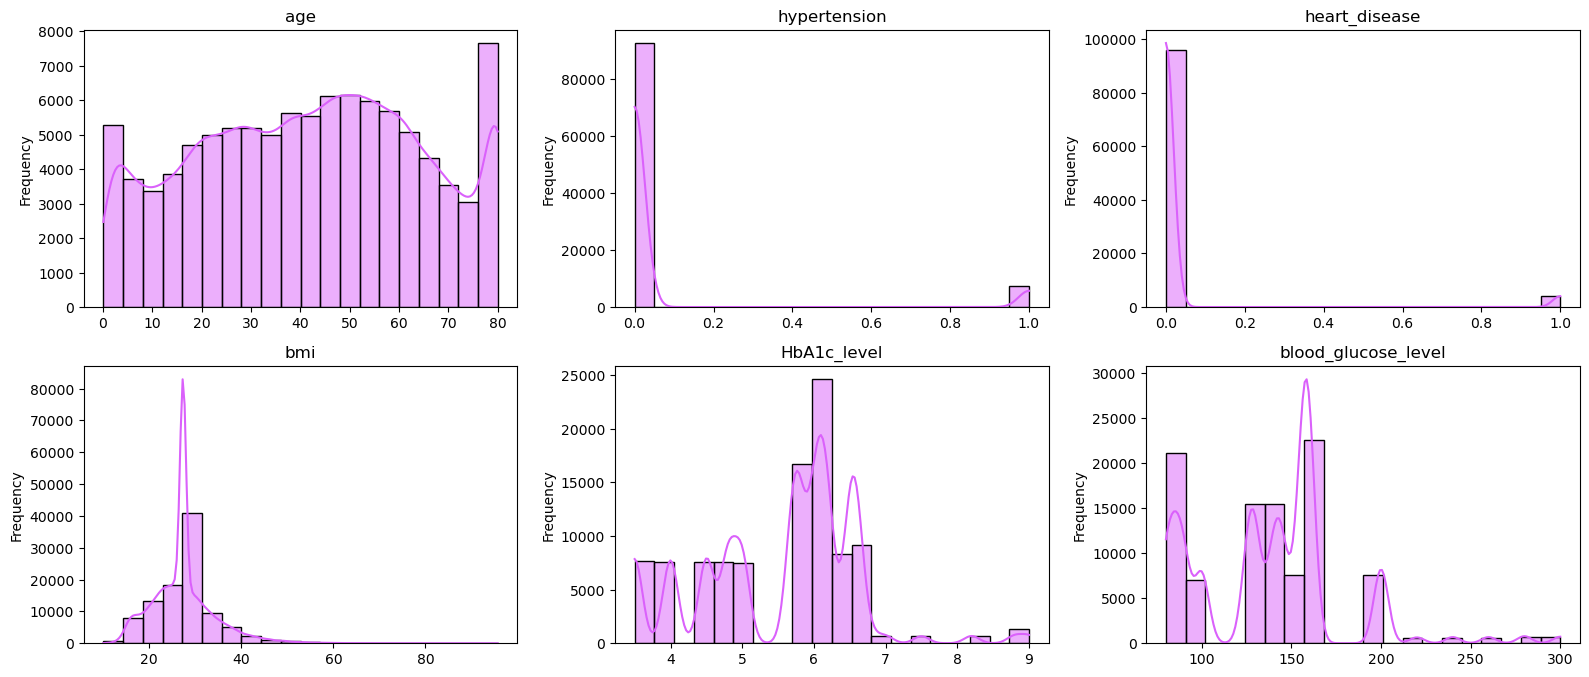

In [9]:
plt.figure(figsize=(16, 10))

# plot histograms for numerical features (columns)
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3 plots in each row
    sns.histplot(dataframe[column], bins=20, kde=True, color='#DA61FB')
    plt.title(column)
    plt.xlabel(None)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Age**:
  - Distribution is almost uniform with a little bit of a left skew
    - Balanced representation of younger and older individuals
  - Most are around 80, least are around 10

- **Hypertension**:  
  - Less common feature in data
  - Most are 0
  - Small peak at 1.0 which is outlier

- **Heart Disease**:  
  - Similar results to Hypertension
    - Also less common feature in data  

- **BMI**:  
  - Right-skewed distribution
  - Peak at 20-25 
    - Most individuals are in normal BMI range 

- **HbAlc Level**:  
  - Multiple peaks
  - Most are between 6 and 7, which is high level
  - Some outliers with higher levels

- **Blood Glucose Level**:  
  - Right-skewed distribution
  - Peak at around 150 
  - Some outliers with higher levels

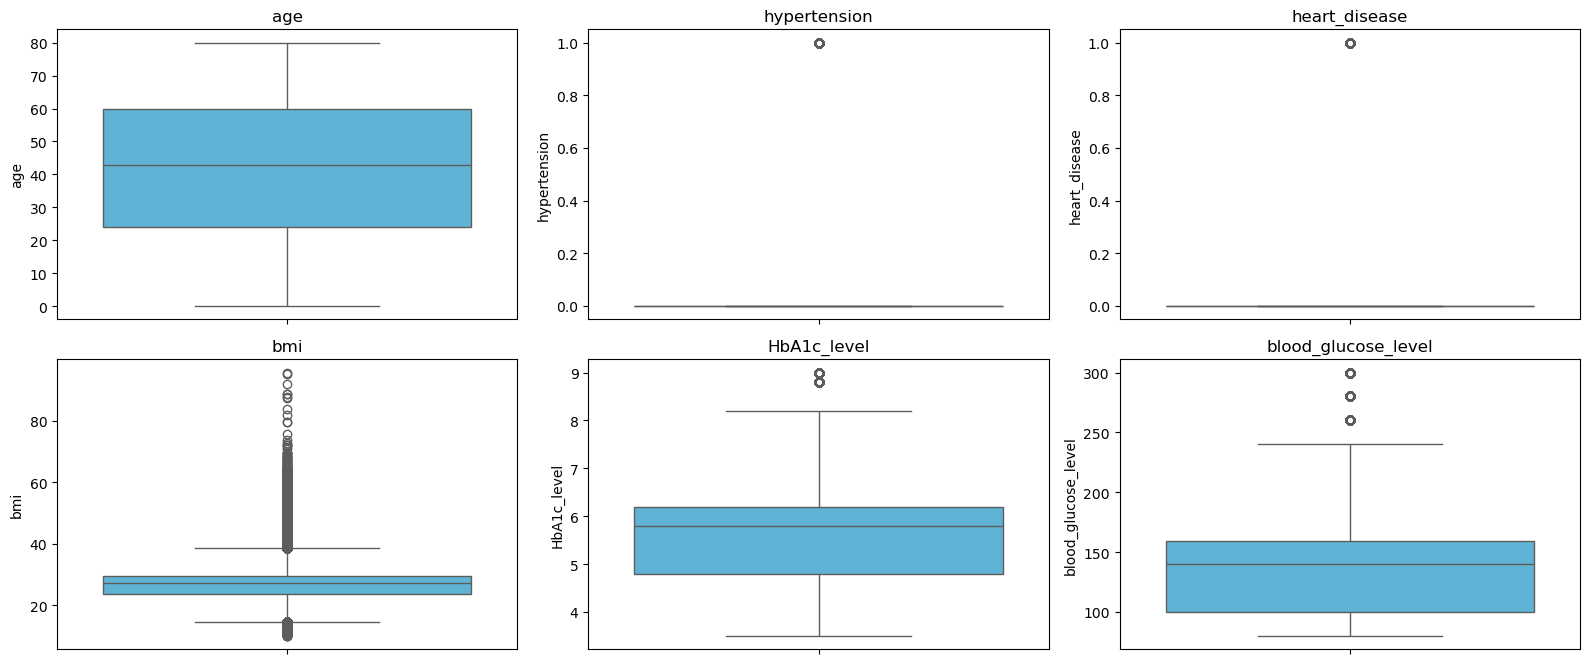

In [10]:
plt.figure(figsize=(16, 10))

# plot boxplots for numerical features (columns)
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3 plots in each row
    sns.boxplot(y=dataframe[column], color='#4BBCEA')
    plt.title(column)

plt.tight_layout()
plt.show()

- **Age**:
  - Median ~ 45 years
  - No significant outliers

- **Hypertension**:  
  - Median at 0 (most have no hypertension)
  - Outlier at 1

- **Heart Disease**:  
  - Median at 0 (most have no heart disease)
  - Outlier at 1

- **BMI**:  
  - Median ~ 24
  - Many high outliers that are 40 and higher

- **HbAlc Level**:  
  - Median ~ 6
  - Some outliers at 8-9 which is high levels

- **Blood Glucose Level**:  
  - Median ~ 140
  - Many outliers that are above 200 which are high levels

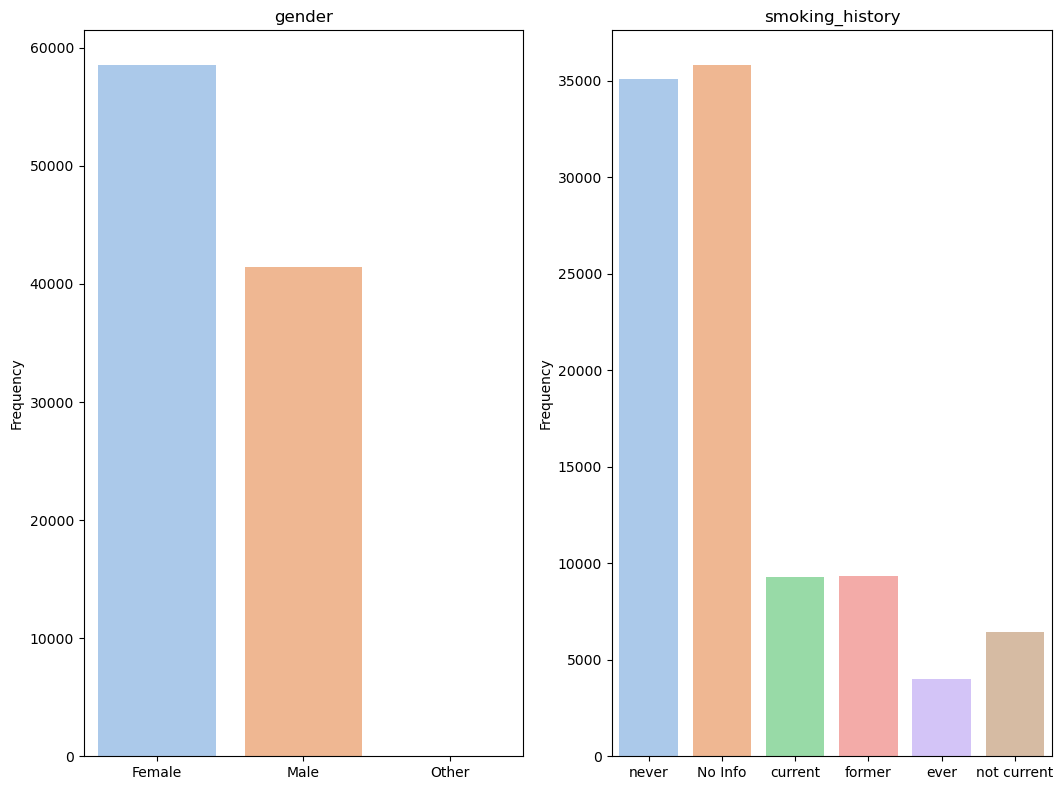

In [11]:
plt.figure(figsize=(16, 8))

# plot boxplots for categorical features (columns)
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)  # 3 plots in each row
    sns.countplot(x=dataframe[column], hue=dataframe[column], palette='pastel', legend=False)
    plt.title(column)
    plt.xlabel(None)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Gender**:
  - More females than males
  - No other
- **Smoking History**:  
  - Most are never or no info
  - Almost equal amounts of current and former
  - Least for ever, then second least is not current

<span style="color:#C361F8">*seaborn documention, HTML colour codes website, and Matplotlib documention (all in references) were referenced in this section*</span>

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

diabetes
0    91500
1     8500
Name: count, dtype: int64


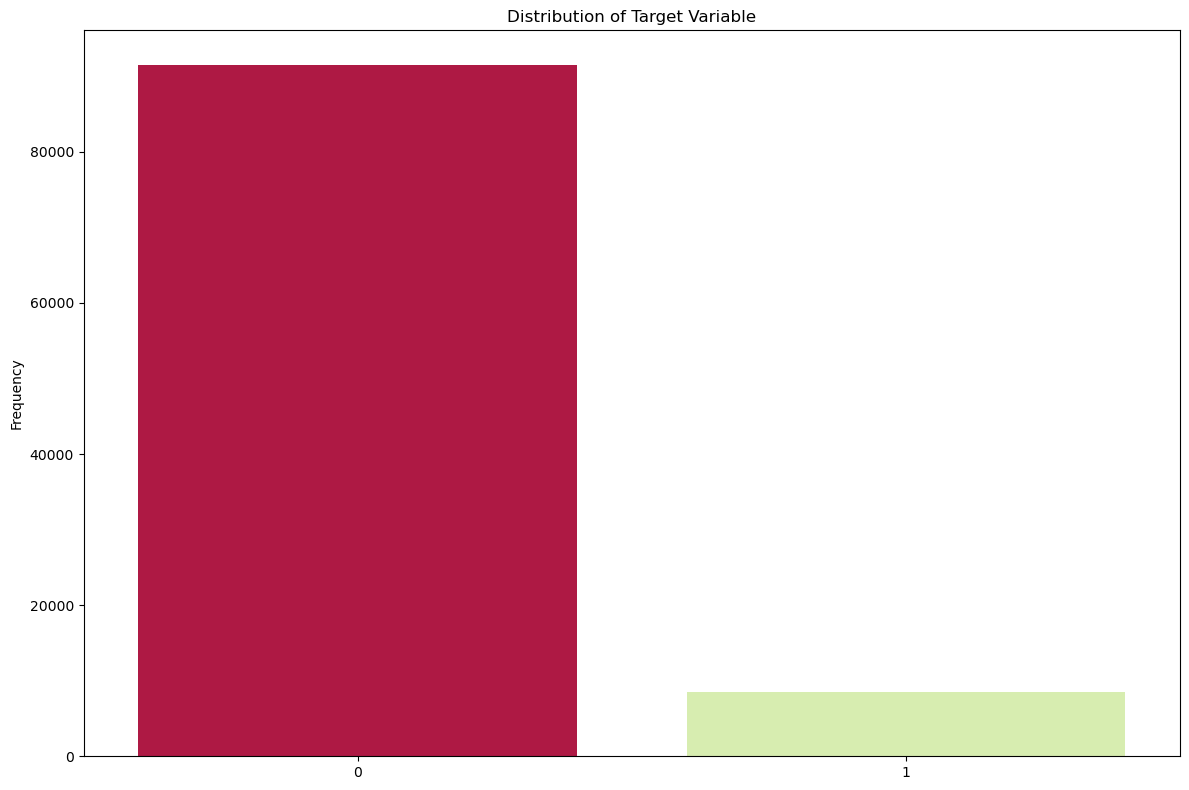

In [12]:
# count frequency of each class label 
class_distribution = dataframe[target_variable].value_counts()

print(class_distribution)

# bar plot for class frequencies
plt.figure(figsize=(12, 8))
sns.barplot(
    x=class_distribution.index,
    y=class_distribution.values,
    hue=class_distribution.index,
    palette=["#C70039", "#DAF7A6"],
    legend=False
)
plt.title('Distribution of Target Variable')
plt.xlabel(None)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


By looking at the bar plot, the dataset seems balanced. However, we can do another check. According to an article in the Medium referenced at the end of the notebook, if the minority class out of the classes is 10-20% of the data or less, then the dataset is imbalanced. So this check was also done to see if the dataset is balanced or imbalanced.

In [13]:
class_frequencies = {
    'No (0)': 91500,
    'Yes (1)': 8500,
}

# get percentage of frequencies of class
def class_percentage(class_count, total_count):
    return (class_count / total_count) * 100

total_instances = sum(class_frequencies.values())

In [14]:
# print percentage for each class
for class_label, class_count in class_frequencies.items():
    percentage = class_percentage(class_count, total_instances)
    print(f"{class_label}: {percentage}%")

No (0): 91.5%
Yes (1): 8.5%


The minority class is the Yes (1) class which is 8.5% of the data, which is less than the 10-20% threshold. Therefore, the data is unbalanced.

<span style="color:#C361F8">*seaborn documention, html colour codes website, and Medium article (all in references) were referenced in this section*</span>

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [15]:
X = dataframe.drop(columns='diabetes')
y = dataframe['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

In [16]:
categorical_columns = ['gender', 'smoking_history']

enc = preprocessing.OneHotEncoder(sparse_output=False)

X_train_encoded = enc.fit_transform(X_train[categorical_columns])
X_test_encoded = enc.transform(X_test[categorical_columns])

# convert one-hot encoded results to dataframe
X_train_enc_df = pd.DataFrame(X_train_encoded, columns=enc.get_feature_names_out(categorical_columns))
X_test_enc_df = pd.DataFrame(X_test_encoded, columns=enc.get_feature_names_out(categorical_columns))

# drop og categorical columns
X_train = X_train.drop(columns=categorical_columns).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_columns).reset_index(drop=True)

# add one-hot encoded columns to original dataset
X_train = pd.concat([X_train, X_train_enc_df], axis=1)
X_test = pd.concat([X_test, X_test_enc_df], axis=1)

X_train.head(), X_test.head()

(    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
 0  73.0             0              0  24.77          3.5                   80   
 1  80.0             0              0  24.60          5.7                  145   
 2  38.0             0              0  24.33          4.0                  158   
 3  26.0             0              0  18.87          5.0                  100   
 4  61.0             1              0  22.11          4.5                   85   
 
    gender_Female  gender_Male  gender_Other  smoking_history_No Info  \
 0            0.0          1.0           0.0                      0.0   
 1            0.0          1.0           0.0                      0.0   
 2            1.0          0.0           0.0                      0.0   
 3            1.0          0.0           0.0                      0.0   
 4            1.0          0.0           0.0                      0.0   
 
    smoking_history_current  smoking_history_ever  smoking_history

6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

In [17]:
# initialize StandardScaler and fit on training data
scaler = preprocessing.StandardScaler().fit(X_train)

# transform both training and test data
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

# convert scaled data back to dataframes 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [18]:
# initializing models
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000)

# training
dt.fit(X_train_scaled_df, y_train)
knn.fit(X_train_scaled_df, y_train)
lr.fit(X_train_scaled_df, y_train)

LogisticRegression(max_iter=1000)

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [19]:
# Cross Validation
models = {
    'Decision Tree': dt,
    'KNN': knn,
    'Logistic Regression': lr
}

# assessing models
for name, model in models.items():
    f1 = cross_val_score(model, X_train_scaled_df, y_train, cv=5, scoring='f1')
    prec = cross_val_score(model, X_train_scaled_df, y_train, cv=5, scoring='precision')
    rec = cross_val_score(model, X_train_scaled_df, y_train, cv=5, scoring='recall')
    
    print(f"{name} F1 Score: {f1.mean()}")
    print(f"{name} Precision: {prec.mean()}")
    print(f"{name} Recall: {rec.mean()}")
    

Decision Tree F1 Score: 0.7196318652071957
Decision Tree Precision: 0.7032257659208467
Decision Tree Recall: 0.7373378372081179
KNN F1 Score: 0.7216904413698342
KNN Precision: 0.8901083389612772
KNN Recall: 0.6070375752768052
Logistic Regression F1 Score: 0.7309617709273549
Logistic Regression Precision: 0.8691654594160039
Logistic Regression Recall: 0.6307421965167579


## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

           Decision Tree       KNN  Logistic Regression
Precision       0.985618  0.893745             0.863934
Recall          0.682084  0.610656             0.617096
F1 Score        0.806228  0.725565             0.719945


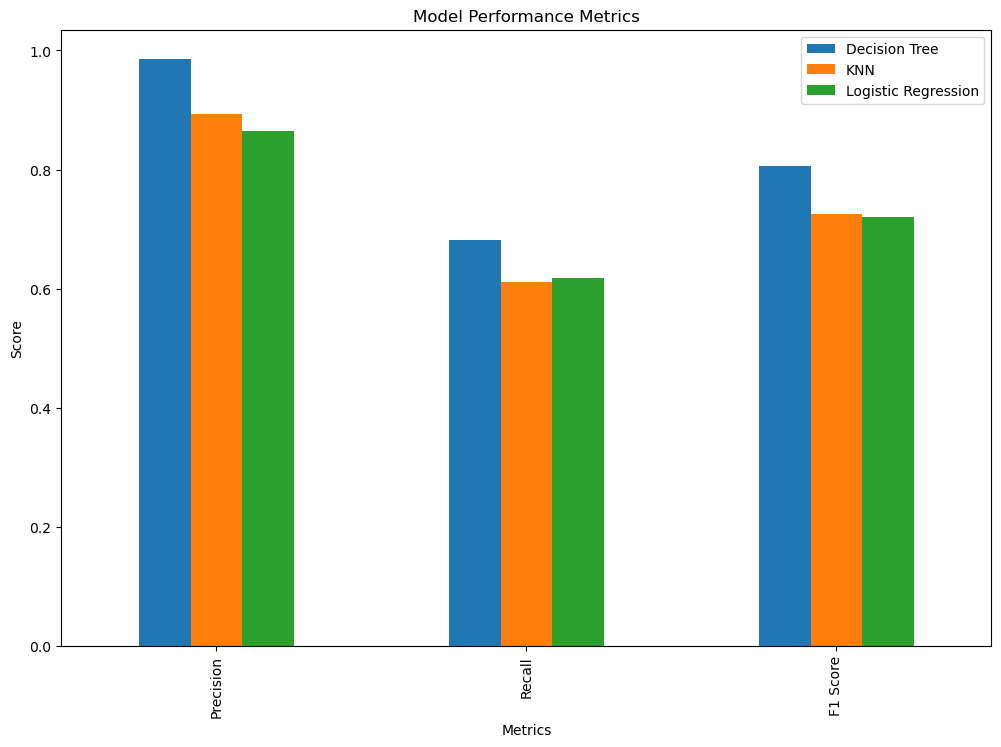

In [20]:
from sklearn.model_selection import GridSearchCV
# Parameter grids - we used a grid search strategy 
dtp = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 15, 20]
}

knnp = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

lrp = {
    'penalty': ['l2'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# using f1 metric 
dt_grid = GridSearchCV(dt, dtp, cv=5, scoring='f1')
knn_grid = GridSearchCV(knn, knnp, cv=5, scoring='f1')
lr_grid = GridSearchCV(lr, lrp, cv=5, scoring='f1')

dt_grid.fit(X_train_scaled_df, y_train)
knn_grid.fit(X_train_scaled_df, y_train)
lr_grid.fit(X_train_scaled_df, y_train)

# testing models w best params on the test set 
best = {
    'Decision Tree': dt_grid.best_estimator_,
    'KNN': knn_grid.best_estimator_,
    'Logistic Regression': lr_grid.best_estimator_
}

# to store precision recall and f1 scores for each model
results = {}

for name, model in best.items():
    y_pred = model.predict(X_test_scaled_df)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    }
    
results_df = pd.DataFrame(results)
print(results_df)

#we could maybe plot the results 
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

## **10**
**Results and Comparing**
- **Decision Tree**: Has highest precision but lower recall compared to the other models. It performs well in predicting positive cases when they actually occur and leaves out false positives, but misses some actual positive cases since the model is only prediciting a positive when it is very confident.

- **K-Nearest Neighbors (KNN)**: Precision and recall are more balanced but slightly lower than Decision Tree. It also has a good F1 score which means it has a balanced performance between precision and recall.

- **Logistic Regression**: Precision is close to KNN but with slightly better recall. It has a similar F1 score to KNN as well.

**Differences in Model Performance**
- **Model Complexity**
  - **Decision Tree**: 
    - Prone to overfitting, especially when the depth of the tree has no max
    - Parameter tuning helps to control overfitting by adjusting the `max_depth` 
  - **KNN**: 
    - Complexity depends on the number of neighbors used for classification
    - Lower number of neighbors can lead to overfitting
    - Higher number makes it more stable but may reduce sensitivity 
  - **Logistic Regression**: 
    - Simplest of the three models
    - Less prone to overfitting because of linear model which limits complexity

- **Data Imbalance**:
  - Data imbalance might have influenced the Decision Tree's recall score since it tends to favor the majority class
  - High precision but low recall means that it is not capturing some minority class instances 
  - KNN and Logistic Regression also suffer from data imbalance, but their performances are more balanced
    - Precision and Recall are more balanced

- **Impact of Parameter Tuning**:
  - **Decision Tree**: 
    - Significant improvement in its F1 score after tuning
    - `max_depth` reduced overfitting and improved model generalization
  - **KNN**:
    - Giving variety to `n_neighbors` and `weights` improved its ability to identify true positives
    - Still struggled with sensitivity compared to Decision Tree
  - **Logistic Regression**:
    - No significant changes with parameter tuning
    - Less complex and more resistant to overfitting


    ** more info on this when we plot them, this is mainly assumptions from looking at scores

- **Model chosen**: Decision Tree
- **Reasoning**: The Decision Tree model has the highest F1 score
**need to add more details to reasoning**



In [21]:
# train Decision Tree with best parameters
best_dt = dt_grid.best_estimator_
best_dt.fit(X_train_scaled_df, y_train)

# trained model applied to test data
y_pred_dt = best_dt.predict(X_test_scaled_df)

prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree on Test Set:")
print(f"Precision: {prec_dt}")
print(f"Recall: {rec_dt}")
print(f"F1 Score: {f1_dt}")

Decision Tree on Test Set:
Precision: 0.9856175972927242
Recall: 0.6820843091334895
F1 Score: 0.8062283737024222


**Observations compared to cross-validation results**:
- Recall is slightly lower
    - Decision Tree missed more true positive cases on test set than during cross-validation
- F1 is higher
    - Higher Precision, slightly lower recall
- Precision is higer
    - Decision Tree made fewer false positive predictions on test set

Therefore, the model is potentially overfitting to the training set. 

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources

> A list of pandas readcsv encoding options. Saturn Cloud Blog. (2023, November 7). https://saturncloud.io/bloga-list-of-pandas-readcsv-encoding-options/ 
>
> HTML Color Codes. (2015, September 3). *HTML color codes*. https://htmlcolorcodes.com/  
>
> Matplotlib 3.9.2 documentation. (n.d.). *Creating multiple subplots using plt.subplots*. https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html  
>  
> seaborn 0.13.2 documentation. (n.d.). *Seaborn.barplot*. https://seaborn.pydata.org/generated/seaborn.barplot.html  
>  
> seaborn 0.13.2 documentation. (n.d.). *Seaborn.boxplot*. https://seaborn.pydata.org/generated/seaborn.boxplot.html  
>  
> seaborn 0.13.2 documentation. (n.d.). *Seaborn.histplot*. https://seaborn.pydata.org/generated/seaborn.histplot.html  
>  
> Siddiqi, F. (2024, April 6). *How can I determine if my data is balanced or imbalanced?*. Medium. https://medium.com/@faheemsiddiqi789/how-can-i-determine-if-my-data-is-balanced-or-imbalanced-080819af408c  
>
> *Content on ______ is from material presented in the course.*
> https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide